In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
from time import perf_counter
from sklearn.metrics import r2_score
from sklearn import metrics
import math 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
X_train = pd.read_csv('data/X_train.csv', index_col=0) 
X_val = pd.read_csv('data/X_val.csv', index_col=0) 
X_test = pd.read_csv('data/X_test.csv', index_col=0) 
y_train = pd.read_csv('data/y_train.csv', index_col=0) 
y_val = pd.read_csv('data/y_val.csv', index_col=0)
y_test = pd.read_csv('data/y_test.csv', index_col=0)

In [3]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

In [4]:
X_train.drop(['description'], axis = 1, inplace = True)
X_val.drop(['description'], axis = 1, inplace = True)
X_test.drop(['description'], axis = 1, inplace = True)

In [5]:
index = X_train.columns
model_score = pd.DataFrame(columns=('r2', 'mae','rmse', 'mse', 'run_time' ))

In [6]:
#analyzing shape to find if there any discrepancy before starting to model
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}') 
print(f'y_test Shape: {y_test.shape}') 
print(f'X_val Shape: {X_val.shape}') 
print(f'y_val Shape: {y_val.shape}')

X_train Shape: (204156, 350)
y_train Shape: (204156,)
X_test Shape: (63799, 350)
y_test Shape: (63799,)
X_val Shape: (51039, 350)
y_val Shape: (51039,)


In [9]:
from sklearn.preprocessing import StandardScaler
# Scaling Data
ss_scaler = StandardScaler()
ss_scaler.fit(X_train)

# Transform
X_train = ss_scaler.transform(X_train)
X_test = ss_scaler.transform(X_test)
X_val = ss_scaler.transform(X_val)

In [14]:
%%time
# Sequential model
#building model with 10 hidden layers having drop out rate of 10% and structure as diamond
model = keras.Sequential()

# Add dense layers with dropout
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dropout(0.1))


# Output layer
model.add(layers.Dense(1))

# Compile the model
model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),  
    # Loss function to minimize
    loss=keras.losses.MeanAbsoluteError(),
    #loss=keras.losses.MeanSquaredError(),
    metrics= keras.metrics.MeanAbsoluteError()
)

Wall time: 22.9 ms


In [15]:
%%time
# Train
history = model.fit(X_train, y_train, epochs=100, verbose=5)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [16]:
from sklearn.metrics import r2_score
from sklearn import metrics
import math 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [100]:
model_score = pd.DataFrame(columns=('r2', 'mae','rmse', 'mse', 'run_time' ))

In [27]:
# Evaluate the model using the test data and generate predictions
train_loss = history.history["loss"][-1]
result = model.evaluate(X_val, y_val, verbose=0)

print(f"Train Loss: {train_loss:.4f}")
print(f"Val Loss: {result[0]:.4f}")

Train Loss: 3082.6646
Val Loss: 3215569.0000


In [70]:
model_predict = model.predict(X_val)

r2_score(y_val,model_predict)

-87899.709731155

In [102]:
model_predict = model.predict(X_val)


model_r2= r2_score(y_val,model_predict)

model_mse = mean_squared_error(y_val, model_predict)
model_mae = mean_absolute_error(y_val, model_predict)
model_rmse = sqrt(mean_squared_error(y_val, model_predict))

model_score = model_score.append(pd.DataFrame({'r2':[model_r2], 'mae':[model_mae],'rmse':[model_rmse], 'mse': [model_mse]},
                                               index = ['Neural Network 10 hidden layers having drop out rate of 10% and structure as diamond']))
# Evaluate
print(f"Neural Network R2 score for val set:  {r2_score(y_val,model_predict)}")
print(f"Neural Network MAE for val set: {model_mae}")
print(f"Neural Network RMSE for val set: {model_rmse}" )
print(f"Neural Network MSE for val set: {model_mse}")

Neural Network R2 score for val set:  -87899.709731155
Neural Network MAE for val set: 3215563.798173185
Neural Network RMSE for val set: 3767256.5055786422
Neural Network MSE for val set: 14192221578824.604


In [24]:
from matplotlib import pyplot

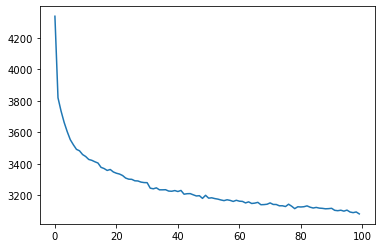

In [28]:
# plot metrics
#pyplot.plot(history.history['mean_squared_error'])
pyplot.plot(history.history['mean_absolute_error'])
pyplot.show()

In [34]:
from sklearn.metrics import r2_score
model_predict = model.predict(X_val)
r2_score(y_val,model_predict)

-87899.709731155

In [31]:
t0 = perf_counter()

# Create a new sequential model
cone_model = keras.Sequential()

# Add 4 dense layers with dropout 20%
# Add dense layers
cone_model.add(layers.Dense(300, activation='relu'))
cone_model.add(layers.Dropout(0.2))
cone_model.add(layers.Dense(200, activation='relu'))
cone_model.add(layers.Dropout(0.2))
cone_model.add(layers.Dense(100, activation='relu'))
cone_model.add(layers.Dropout(0.2))
cone_model.add(layers.Dense(50, activation='relu'))
cone_model.add(layers.Dropout(0.2))


# Output layer
cone_model.add(layers.Dense(1))

# Compile the model
cone_model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),  
    # Loss function to minimize
    loss=keras.losses.MeanAbsoluteError(),
    metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity']
)


# Train the model
history_cone = cone_model.fit(X_train, 
                    y_train, 
                    epochs=100, 
                    verbose=1, 
                    # Pass in a validation data set to test each epoch.
                    validation_data=(X_val, y_val)) 
t1 = perf_counter()
time_taken = t1 - t0

Epoch 1/100
6380/6380 [==============================] - 19s 3ms/step - loss: 4652.1694 - mean_squared_error: 61992541.4562 - mean_absolute_error: 4652.1694 - mean_absolute_percentage_error: 32.8031 - cosine_proximity: 0.9972 - val_loss: 16630882.0000 - val_mean_squared_error: 407231015157760.0000 - val_mean_absolute_error: 16630882.0000 - val_mean_absolute_percentage_error: 226540.5781 - val_cosine_proximity: 1.0000
Epoch 2/100
6380/6380 [==============================] - 20s 3ms/step - loss: 3334.5174 - mean_squared_error: 29020786.1348 - mean_absolute_error: 3334.5174 - mean_absolute_percentage_error: 23.6571 - cosine_proximity: 1.0000 - val_loss: 22102098.0000 - val_mean_squared_error: 721215538855936.0000 - val_mean_absolute_error: 22102098.0000 - val_mean_absolute_percentage_error: 301377.6562 - val_cosine_proximity: 1.0000
Epoch 3/100
6380/6380 [==============================] - 21s 3ms/step - loss: 3291.9017 - mean_squared_error: 28013267.6593 - mean_absolute_error: 3291.9017 -

In [35]:
# Evaluate the model using the test data and generate predictions
train_loss = history.history["loss"][-1]
result = cone_model.evaluate(X_val, y_val, verbose=0)

print(f"Train Loss: {train_loss:.4f}")
print(f"Val Loss: {result[0]:.4f}")

Train Loss: 3082.6646
Val Loss: 32931048.0000


In [82]:
time_taken

2026.5737467

In [103]:
cone_model_predict = cone_model.predict(X_val)


cone_model_r2= r2_score(y_val,cone_model_predict)

cone_model_mse = mean_squared_error(y_val, cone_model_predict)
cone_model_mae = mean_absolute_error(y_val, cone_model_predict)
cone_model_rmse = sqrt(mean_squared_error(y_val, cone_model_predict))

model_score = model_score.append(pd.DataFrame({'r2':[cone_model_r2], 'mae':[cone_model_mae],'rmse':[cone_model_rmse], 'mse': [cone_model_mse],
                                               'run_time':[(time_taken)/60]},
                                               index = ['Neural Network 4 hidden layers having drop out rate of 20% and structure as cone']))
# Evaluate
print(f"Neural Network R2 score for val set:  {cone_model_r2}")
print(f"Neural Network MAE for val set: {cone_model_mae}")
print(f"Neural Network RMSE for val set: {cone_model_rmse}" )
print(f"Neural Network MSE for val set: {cone_model_mse}")

Neural Network R2 score for val set:  -12616567.623048631
Neural Network MAE for val set: 38846402.43697956
Neural Network RMSE for val set: 45133563.85264738
Neural Network MSE for val set: 2037038586040998.2


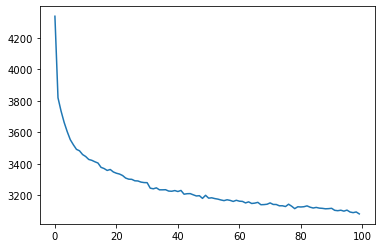

In [39]:
pyplot.plot(history.history['mean_absolute_error'])
#pyplot.plot(history.history['mean_squared_error'])
#pyplot.plot(history.history['val_mean_absolute_error'])
#pyplot.plot(history.history['val_mean_absolute_percentage_error'])
pyplot.show()

In [50]:
# Sequential model

cone3_model = keras.Sequential()


# Add 6 dense layers with dropout 10%
# Add dense layers
cone3_model.add(layers.Dense(350, activation='relu'))
cone3_model.add(layers.Dropout(0.1))
cone3_model.add(layers.Dense(300, activation='relu'))
cone3_model.add(layers.Dropout(0.1))
cone3_model.add(layers.Dense(200, activation='relu'))
cone3_model.add(layers.Dropout(0.1))
cone3_model.add(layers.Dense(100, activation='relu'))
cone3_model.add(layers.Dropout(0.1))
cone3_model.add(layers.Dense(50, activation='relu'))
cone3_model.add(layers.Dropout(0.1))
cone3_model.add(layers.Dense(25, activation='relu'))
cone3_model.add(layers.Dropout(0.1))

# Output layer
cone3_model.add(layers.Dense(1))

# Compile the model
cone3_model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),  
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    metrics= keras.metrics.MeanSquaredError()
)

In [108]:
%%timeit
# Evaluate the model using the test data and generate predictions
cone3_train_loss = history_cone3.history["loss"][-1]
cone3_result = cone3_model.evaluate(X_val, y_val, verbose=0)

print(f"Train Loss: {cone3_train_loss:.4f}")
print(f"Val Loss: {cone3_result[0]:.4f}")

y_pred_cone3 = cone2_model.predict(X_val)

Train Loss: 15569038.0000
Val Loss: 5802057361522688.0000
Train Loss: 15569038.0000
Val Loss: 5802057361522688.0000
Train Loss: 15569038.0000
Val Loss: 5802057361522688.0000
Train Loss: 15569038.0000
Val Loss: 5802057361522688.0000
Train Loss: 15569038.0000
Val Loss: 5802057361522688.0000
Train Loss: 15569038.0000
Val Loss: 5802057361522688.0000
Train Loss: 15569038.0000
Val Loss: 5802057361522688.0000
Train Loss: 15569038.0000
Val Loss: 5802057361522688.0000
1.96 s ± 162 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [110]:
cone3_model_predict = cone3_model.predict(X_val)


cone3_model_r2= r2_score(y_val,cone3_model_predict)

cone3_model_mse = mean_squared_error(y_val, cone3_model_predict)
cone3_model_mae = mean_absolute_error(y_val, cone3_model_predict)
cone3_model_rmse = sqrt(mean_squared_error(y_val, cone3_model_predict))

model_score = model_score.append(pd.DataFrame({'r2':[cone3_model_r2], 'mae':[cone3_model_mae],'rmse':[cone3_model_rmse], 'mse': [cone3_model_mse]},
                                               index = ['Neural Network 6 hidden layers having drop out rate of 10% and structure shape as cone']))
# Evaluate
print(f"Neural Network R2 score for val set:  {cone3_model_r2}")
print(f"Neural Network MAE for val set: {cone3_model_mae}")
print(f"Neural Network RMSE for val set: {cone3_model_rmse}" )
print(f"Neural Network MSE for val set: {cone3_model_mse}")

Neural Network R2 score for val set:  -35935538.06025182
Neural Network MAE for val set: 68430519.4393503
Neural Network RMSE for val set: 76171250.01422517
Neural Network MSE for val set: 5802059328729597.0


In [61]:
# Sequential model

cone4_model = keras.Sequential()


# Add dense layers with dropout 
#Neural Network 6 hidden layers having drop out rate of 10%, starting from 100 and structure shape as cone
# Add dense layers
cone4_model.add(layers.Dense(100, activation='relu'))
cone4_model.add(layers.Dropout(0.1))
cone4_model.add(layers.Dense(80, activation='relu'))
cone4_model.add(layers.Dropout(0.1))
cone4_model.add(layers.Dense(60, activation='relu'))
cone4_model.add(layers.Dropout(0.1))
cone4_model.add(layers.Dense(40, activation='relu'))
cone4_model.add(layers.Dropout(0.1))
cone4_model.add(layers.Dense(20, activation='relu'))
cone4_model.add(layers.Dropout(0.1))
cone4_model.add(layers.Dense(10, activation='relu'))
cone4_model.add(layers.Dropout(0.1))

# Output layer
cone4_model.add(layers.Dense(1))

# Compile the model
cone4_model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),  
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    metrics= keras.metrics.MeanSquaredError()
)

In [57]:
%%time
history_cone4 = cone4_model.fit(X_train, y_train, epochs=100, verbose=5)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [58]:
# Evaluate the model using the test data and generate predictions
cone4_train_loss = history_cone4.history["loss"][-1]
cone4_result = cone4_model.evaluate(X_val, y_val, verbose=0)

print(f"Train Loss: {cone4_train_loss:.4f}")
print(f"Val Loss: {cone4_result[0]:.4f}")

y_pred_cone4 = cone4_model.predict(X_val)

Train Loss: 24070874.0000
Val Loss: 957855150637056.0000


In [105]:
cone4_model_r2= r2_score(y_val,y_pred_cone4)

cone4_model_mse = mean_squared_error(y_val, y_pred_cone4)
cone4_model_mae = mean_absolute_error(y_val, y_pred_cone4)
cone4_model_rmse = sqrt(mean_squared_error(y_val, y_pred_cone4))

model_score = model_score.append(pd.DataFrame({'r2':[cone4_model_r2], 'mae':[cone4_model_mae],'rmse':[cone4_model_rmse], 'mse': [cone4_model_mse]},
                                               index = ['Neural Network 6 hidden layers having drop out rate of 10%, starting from 100 and structure shape as cone']))
# Evaluate
print(f"Neural Network R2 score for val set:  {cone4_model_r2}")
print(f"Neural Network MAE for val set: {cone4_model_mae}")
print(f"Neural Network RMSE for val set: {cone4_model_rmse}" )
print(f"Neural Network MSE for val set: {cone4_model_mse}")

Neural Network R2 score for val set:  -5932559.2364157485
Neural Network MAE for val set: 25945316.47253081
Neural Network RMSE for val set: 30949246.423895244
Neural Network MSE for val set: 957855854206992.5


In [59]:
y_pred_cone4

array([[ 6261029.5],
       [50954116. ],
       [37271760. ],
       ...,
       [10722392. ],
       [11226592. ],
       [ 8659778. ]], dtype=float32)

In [62]:
r2_score(y_val,y_pred_cone4)

-5932559.2364157485

In [106]:
model_score

,r2,mae,rmse,mse,run_time
Neural Network 10 hidden layers having drop out rate of 10% and structure as diamond,-8.789971e+04,3.215564e+06,3.767257e+06,1.419222e+13,NaN
Neural Network 4 hidden layers having drop out rate of 20% and structure as cone,-1.261657e+07,3.884640e+07,4.513356e+07,2.037039e+15,33.776229
Neural Network 6 hidden layers having drop out rate of 10% and structure shape as cone,-3.593554e+07,6.843052e+07,7.617125e+07,5.802059e+15,NaN
"Neural Network 6 hidden layers having drop out rate of 10%, starting from 100 and structure shape as cone",-5.932559e+06,2.594532e+07,3.094925e+07,9.578559e+14,NaN


In [107]:
model_score.to_csv('data/model_scores.csv', mode='a', index=False, header=False)